In [2]:
import numpy as np
from gpcm import RGPCM

model = RGPCM(window=2, scale=1, n_u=30, t=(0,10))


In [3]:
import os
save_directory = '../preprocessed_data_wheel_acc_new/'
emission_title = 'CO2 Rate [g.s-1]'
file_name = [os.path.splitext(f)[0] for f in os.listdir(save_directory)]
file_name = [i for i in file_name if emission_title in i]
A_all = {}
for file_index in range(0, 14):
    A_all[file_index] = np.loadtxt(save_directory + file_name[file_index] + '.txt',
               delimiter=',')

In [4]:
A = A_all[0]
Emission = A[:, -1]

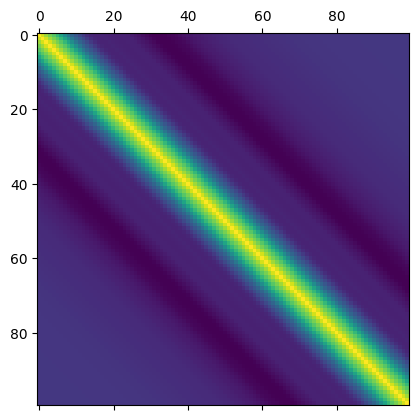

In [10]:
t = np.linspace(0, 10, 100)
K,y = model.sample(t)
import matplotlib.pyplot as plt
plt.matshow(K)

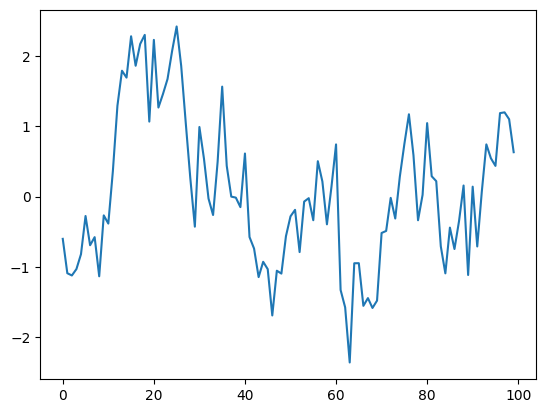

In [12]:
plt.plot(y)

In [25]:
# Normlaize:
def Normalize(x):
    norm = np.loadtxt(save_directory + 'train/CO2 Rate [g.s-1]/norm_' + str(0) + '.txt',
            delimiter=',')
    y = (x - norm[0, -1])/norm[1,-1]
    return y
y_train = Normalize(Emission[:100])
y_test = Normalize(Emission[100:200])
model.fit(t, y_train)
posterior = model.condition(t, y_test)

/Users/chogaliu/miniforge3/envs/GP_July/lib/python3.8/site-packages/plum/function.py:392: ToDenseWarning: Multiplying <low-rank matrix: batch=(), shape=(35, 35), dtype=float64, rank=1> and <dense matrix: batch=(), shape=(35, 35), dtype=float64>: converting to dense.
  return _convert(method(*args, **kw_args), return_type)


Gibbs sampling:
    Iteration 1/2500:
        Time elapsed: 0.4 s
        Time left:  897.9 s
    Iteration 2500/2500:
        Time elapsed: 1.3 s
        Time left:  0.0 s
    Done!
Minimisation of "objective":
    Iteration 1/1000:
        Time elapsed: 5.6 s
        Time left:  5608.2 s
        Objective value: 69.98
    Iteration 34/1000:
        Time elapsed: 6.6 s
        Time left:  25.0 s
        Objective value: 66.55
    Iteration 67/1000:
        Time elapsed: 7.6 s
        Time left:  24.1 s
        Objective value: 70.9
    Iteration 98/1000:
        Time elapsed: 8.7 s
        Time left:  26.9 s
        Objective value: 68.11
    Iteration 132/1000:
        Time elapsed: 9.7 s
        Time left:  27.2 s
        Objective value: 69.97
    Iteration 166/1000:
        Time elapsed: 10.7 s
        Time left:  31.1 s
        Objective value: 78.6
    Iteration 199/1000:
        Time elapsed: 11.8 s
        Time left:  64.5 s
        Objective value: 70.14
    Iteration 231/100

In [ ]:
print(model.elbo(t, y))

In [27]:
mean, var = posterior.predict(t)


/Users/chogaliu/miniforge3/envs/GP_July/lib/python3.8/site-packages/plum/function.py:392: ToDenseWarning: Multiplying <low-rank matrix: batch=(), shape=(35, 35), dtype=float64, rank=1> and <dense matrix: batch=(100,), shape=(35, 35), dtype=float64>: converting to dense.
  return _convert(method(*args, **kw_args), return_type)


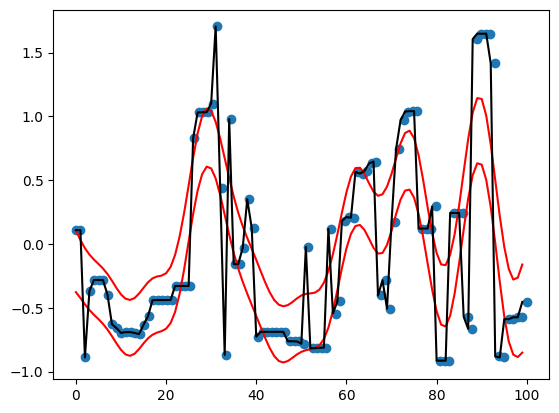

In [30]:
# plt.scatter(t*10, mean,c='red')
plt.scatter(t*10, y_test)
plt.plot(mean+3*var,c='red')
plt.plot(mean-3*var,c='red')
plt.plot(y_test,c='black')